# Gaussian Processes in Numpy

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Define a kernel
mu= np.zeros(100)
xx=np.arange(0,1,0.01)
l=len(xx)
def kernel(x,y):
    lx=len(x)
    ly=len(y)
    k= np.zeros([lx,ly])
    for i in range(lx):
        for j in range(ly):
            k[i,j]= np.exp(-np.linalg.norm((x[i]-y[j]))**2)
    return k

k=kernel(xx,xx)     

/home/biagio/miniconda3/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


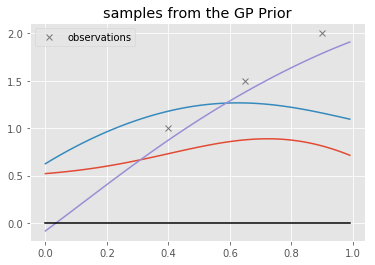

In [28]:
# Sample data
sample_one=np.random.multivariate_normal(mu,k,3)  
x_obs=[0.4,0.9,0.65] #,0.2,0.8]
y_obs=[1,2,1.5]#,2,-1]

plt.plot(xx,sample_one[0,:])
plt.plot(xx,sample_one[1,:])
plt.plot(xx,sample_one[2,:])
plt.plot(x_obs,y_obs,"x",label="observations")
plt.plot(xx,mu,"-",color="black")
plt.title("samples from the GP Prior")
plt.legend()
plt.show()

## Posterior

In [25]:
x_test= x_obs
x_samp=np.linspace(0,1,100)
y=y_obs
var_y=0.01

# Compute posterior
mu_post=kernel(x_samp,x_test).dot( np.linalg.inv(kernel(x_test,x_test) + 
                                                 var_y*np.identity(len(x_test)))).dot(y) 
cov_post= kernel(x_samp,x_samp)-kernel(x_samp,x_test).dot(np.linalg.inv(kernel(x_test,x_test)+
                                                                        var_y*np.identity(len(x_test)))).dot(kernel(x_test,x_samp)) 

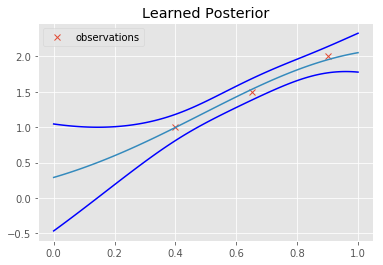

In [29]:
variance= np.diag(cov_post)
std=np.sqrt(variance)

plt.plot(x_obs,y_obs,"x",label="observations")

plt.plot(x_samp,mu_post)
plt.plot(x_samp,mu_post+2*std,color="b")
plt.plot(x_samp,mu_post-2*std,color="b")
plt.title("Learned Posterior")
plt.legend()

plt.show()